In [1]:
import numpy as np
import cv2
!pip install git+https://github.com/rcmalli/keras-vggface.git
from keras_vggface.vggface import VGGFace
import matplotlib.pyplot as plt


  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-d3imljlv
  Running command git clone -q https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-d3imljlv
  Created wheel for keras-vggface: filename=keras_vggface-0.6-cp36-none-any.whl size=8311 sha256=e6af8d7f1e4fa532e7040cc832796176b5f6a716eeadc33e3ea591ff9a87e90f
  Stored in directory: /tmp/pip-ephem-wheel-cache-7jvroo5a/wheels/36/07/46/06c25ce8e9cd396dabe151ea1d8a2bc28dafcb11321c1f3a6d
Successfully built keras-vggface


Using TensorFlow backend.


In [2]:
from google.colab import drive
from os import listdir
drive.mount('/data')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /data


In [0]:
from zipfile import ZipFile
with ZipFile('/data/My Drive/oneShotter.zip', 'r') as f:
  f.extractall('./')
  

In [0]:
face_cascade = cv2.CascadeClassifier('./oneShotter/haarcascade_frontalface_default.xml')

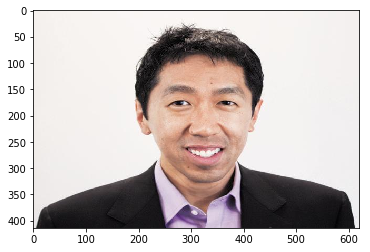

In [6]:
img = cv2.imread('./oneShotter/andrew1.jpg')
img2 = np.copy(img)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

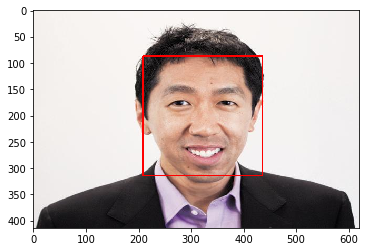

In [8]:
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    cv2.rectangle(img2,(x,y),(x+w,y+h),(255,0,0),2)
    andrew = img2[y:y+h, x:x+w]
    
plt.imshow(img2)

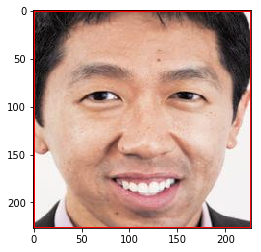

In [9]:
plt.imshow(andrew)

In [10]:
# create a vggface model
model = VGGFace(model='resnet50', include_top=False, input_shape=(224, 224, 3), pooling='avg')
andrew = cv2.resize(andrew, (224,224))
andrew = np.expand_dims(andrew, axis=0)
andrew.shape


(1, 224, 224, 3)

In [11]:
andF = model.predict(andrew)
andF.shape

(1, 2048)

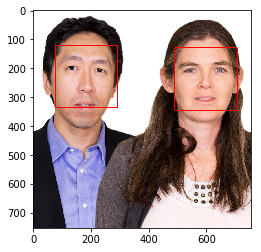

In [12]:
andrew_wife = cv2.imread('./oneShotter/andrew wife.jpg')
aw_copy = np.copy(andrew_wife)
aw_copy = cv2.cvtColor(aw_copy, cv2.COLOR_BGR2RGB)
image = []
gray = cv2.cvtColor(andrew_wife, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 3, 5)
for (x,y,w,h) in faces:
    cv2.rectangle(aw_copy,(x,y),(x+w,y+h),(255,0,0),2)
    image.append(aw_copy[y:y+h, x:x+w])
    
plt.imshow(aw_copy)

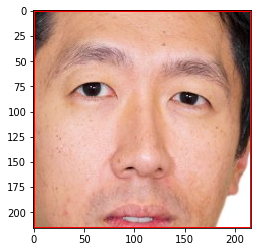

In [13]:
plt.imshow(image[0])

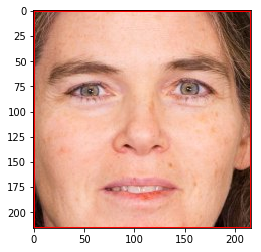

In [14]:
plt.imshow(image[1])

In [0]:
andrew = cv2.resize(image[1], (224,224))
andrew = np.expand_dims(andrew, axis=0)
z = model.predict(andrew)

In [0]:
from scipy.spatial.distance import cosine

In [18]:
d = cosine(z,andF )
d

0.6762388944625854

In [19]:
andrew = cv2.resize(image[0], (224,224))
andrew = np.expand_dims(andrew, axis=0)
z = model.predict(andrew)
d = cosine(z,andF )
d

0.35407280921936035